In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame({
    'country': ['Argentina', 'Brazil', 'Cuba', 'Peru'],
    'number': [212, 334, 1500, 130] 
})
df

,country,number
0,Argentina,212
1,Brazil,334
2,Cuba,1500
3,Peru,130


In [3]:
total = sum(df['number'])
proportions = [(float(value) / total) for value in df['number']]
proportions

[0.0974264705882353,
 0.15349264705882354,
 0.6893382352941176,
 0.05974264705882353]

In [4]:
width = 40
height = 10
total = width * height
total

400

In [5]:
tiles_per_category = [round(proportion * total) for proportion in proportions]
tiles_per_category

[39, 61, 276, 24]

In [6]:
waffle = np.zeros((height, width))
category_index = 0
tile_index = 0
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle[row, col] = category_index

In [7]:
waffle

array([[1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4.],
       [1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4.],
       [1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4.],
       [1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4.],
       [1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 4., 4.],
       [1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
   

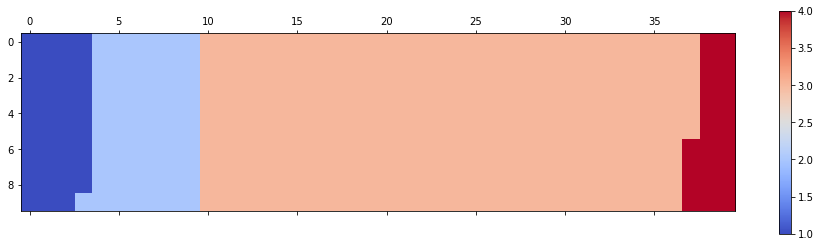

In [8]:
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
plt.colorbar()
plt.show()

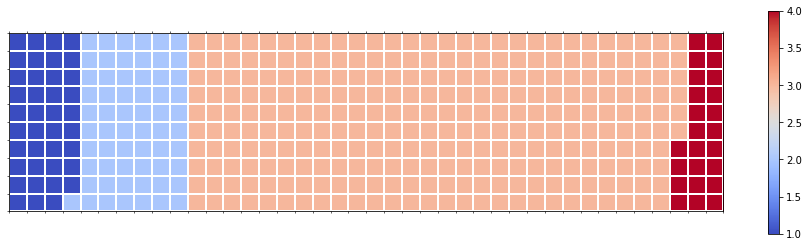

In [9]:
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

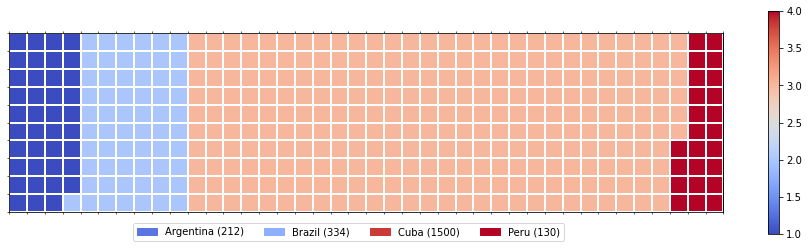

In [10]:
colormap = plt.cm.coolwarm
plt.matshow(waffle, cmap=colormap)
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])
values = df['number']
categories = df['country']
value_sign = ''
values_cumsum = np.cumsum(values)
total_values = values_cumsum[len(values_cumsum) - 1]
legend_handles = []
for i, category in enumerate(categories):
    if value_sign == '%':
        label_str = category + ' (' + str(values[i]) + value_sign + ')' 
    else:
        label_str = category + ' (' + value_sign + str(values[i]) + ')'
    color_val = colormap(float(values_cumsum[i]) / total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc = 'lower center', ncol=len(categories),
          bbox_to_anchor=(0., -0.19, 0.95, 0.1)) #positioning legends
plt.colorbar()
plt.show()